In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [4]:
roughdraft = pd.read_csv("mergeddata.csv")
wordFrequency = {}

for y in roughdraft["Place Name_x"]:
	if y in wordFrequency.keys():
		wordFrequency[y] = wordFrequency.get(y)+1
	else: 
		wordFrequency[y] = 1


print(wordFrequency)

{'San Diego': 652, nan: 112, 'Lemon Grove': 19, 'Spring Valley': 26, 'National City': 62, 'Chula Vista': 81, 'Otay Castle Park': 14, 'Imperial Beach': 20, 'Coronado': 16, 'Grossmont Mount Helix': 16, 'La Mesa': 37, 'El Cajon': 66, 'Santee': 12, 'Lakeside': 8, 'Del Mar': 5, 'Solana Beach': 5, 'Cardiff by the Sea': 5, 'Encinitas': 10, 'Carlsbad': 16, 'Oceanside': 50, 'Vista': 31, 'San Marcos': 1}


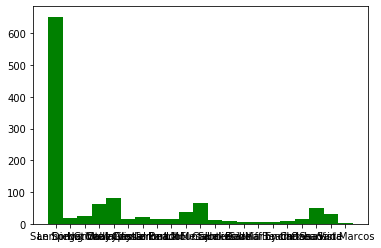

In [5]:
for x in wordFrequency.keys():
    if x != 'nan':
        plt.bar(x, wordFrequency.get(x), 1.0, color='g')

In [6]:
roughdraft.head(10)

,Census Tract Name,Block Group,Place Name_x,Total persons,Male persons age under 5 years,Male persons age 5 years,Male persons age 6 years,Male persons age 7-9 years,Male persons age 10-13 years,Male persons age 14 years,...,Renter occupied housing units with 1.01 or more persons per room,Total Black occupied housing units with 1.01 or more persons per room,Black owner occupied housing units with 1.01 or more persons per room,Black renter occupied housing units with 1.01 or more persons per room,Persons in occupied housing units with all plumbing facilities,Persons in occupied housing units lacking one or more plumbing facilities,Persons in occupied housing units with 1.01 or more persons per room with all plumbing facilities,Persons in occupied housing units with 1.01 or more persons per room lacking one or more plumbing facilities,Families with all plumbing facilities,Families lacking one or more plumbing facilities
0,Census Tract 1,1,San Diego,901,31,6,9,29,32,9,...,10,...,...,...,897,4,30,0,225,1
1,Census Tract 1,2,San Diego,683,28,2,9,14,21,6,...,11,...,...,...,683,0,78,0,174,0
2,Census Tract 1,3,San Diego,532,18,4,4,15,26,6,...,13,...,...,...,532,0,34,0,136,0
3,Census Tract 1,4,San Diego,421,9,3,5,5,7,3,...,9,...,...,...,421,0,21,0,119,0
4,Census Tract 1,5,San Diego,489,12,2,4,6,13,4,...,0,...,...,...,486,3,9,0,142,1
5,Census Tract 1,6,San Diego,498,19,2,3,11,11,7,...,0,...,...,...,489,9,6,0,137,1
6,Census Tract 1,9,San Diego,6,0,0,0,0,0,0,...,...,...,...,...,...,...,...,...,...,...
7,Census Tract 2,1,San Diego,"1,082",32,10,5,21,34,8,...,20,...,...,...,"1,081",1,53,0,283,0
8,Census Tract 2,2,San Diego,"2,151",83,18,14,42,52,11,...,74,...,...,...,"2,008",33,150,0,529,7
9,Census Tract 2,3,San Diego,"1,348",39,2,8,23,37,7,...,68,...,...,...,"1,331",17,103,0,344,7


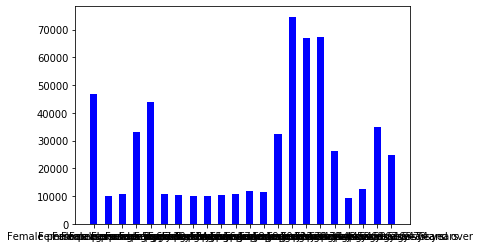

In [43]:

for i in range(26, 48):
    a = 0
    for j in roughdraft.iloc[ : , i ]:
        if j != "...":
            a = a + int(j)
    plt.bar(roughdraft.columns[i], a, 0.5, color='b')